In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib as  mpl
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("fred_data.csv")

In [6]:
df.description.unique()


array(['Total Nonfarm', ' Unemployment Rate', ' Unemployed for 27 Weeks',
       ' Civilian Participation Rate', '  Hires: Total Private ',
       ' OECD Business Confidence', ' Civilian Labor Force',
       ' OECD US Consumer Confidence', ' Part-Time for Econ Reasons',
       ' BLS private', ' Job Openings: Total Private', ' ADP',
       ' Unemployed plus Marginally Attached ',
       '  Total Separations: Total Private ', ' Unemployment Level',
       ' Initial Claims', ' Continued Claims '], dtype=object)

In [7]:
thecols = ['date', 'val', 'series_id']
x = df[thecols]
x.head()
x.columns

Index(['date', 'val', 'series_id'], dtype='object')

In [8]:
x = df[thecols].pivot(index="date", columns="series_id", values="val")
x.columns

Index(['BSCICP03USM665S', 'CCSA', 'CIVPART', 'CLF16OV', 'CSCICP03USM665S',
       'ICSA', 'JTS1000HIL', 'JTS1000JOL', 'JTS1000TSL', 'LNS12032194',
       'NPPTTL', 'PAYEMS', 'U6Rate', 'UEMP27OV', 'UNEMPLOY', 'UNRATE',
       'USPRIV'],
      dtype='object', name='series_id')

In [9]:
x.index = pd.to_datetime(x.index)
y = x.ffill(axis=0, inplace=False)

In [10]:
y.columns


Index(['BSCICP03USM665S', 'CCSA', 'CIVPART', 'CLF16OV', 'CSCICP03USM665S',
       'ICSA', 'JTS1000HIL', 'JTS1000JOL', 'JTS1000TSL', 'LNS12032194',
       'NPPTTL', 'PAYEMS', 'U6Rate', 'UEMP27OV', 'UNEMPLOY', 'UNRATE',
       'USPRIV'],
      dtype='object', name='series_id')

In [11]:
plot_cols = 4
plot_rows = int(np.ceil(len(y.columns) / plot_cols))
plot_rows
y.columns[

5

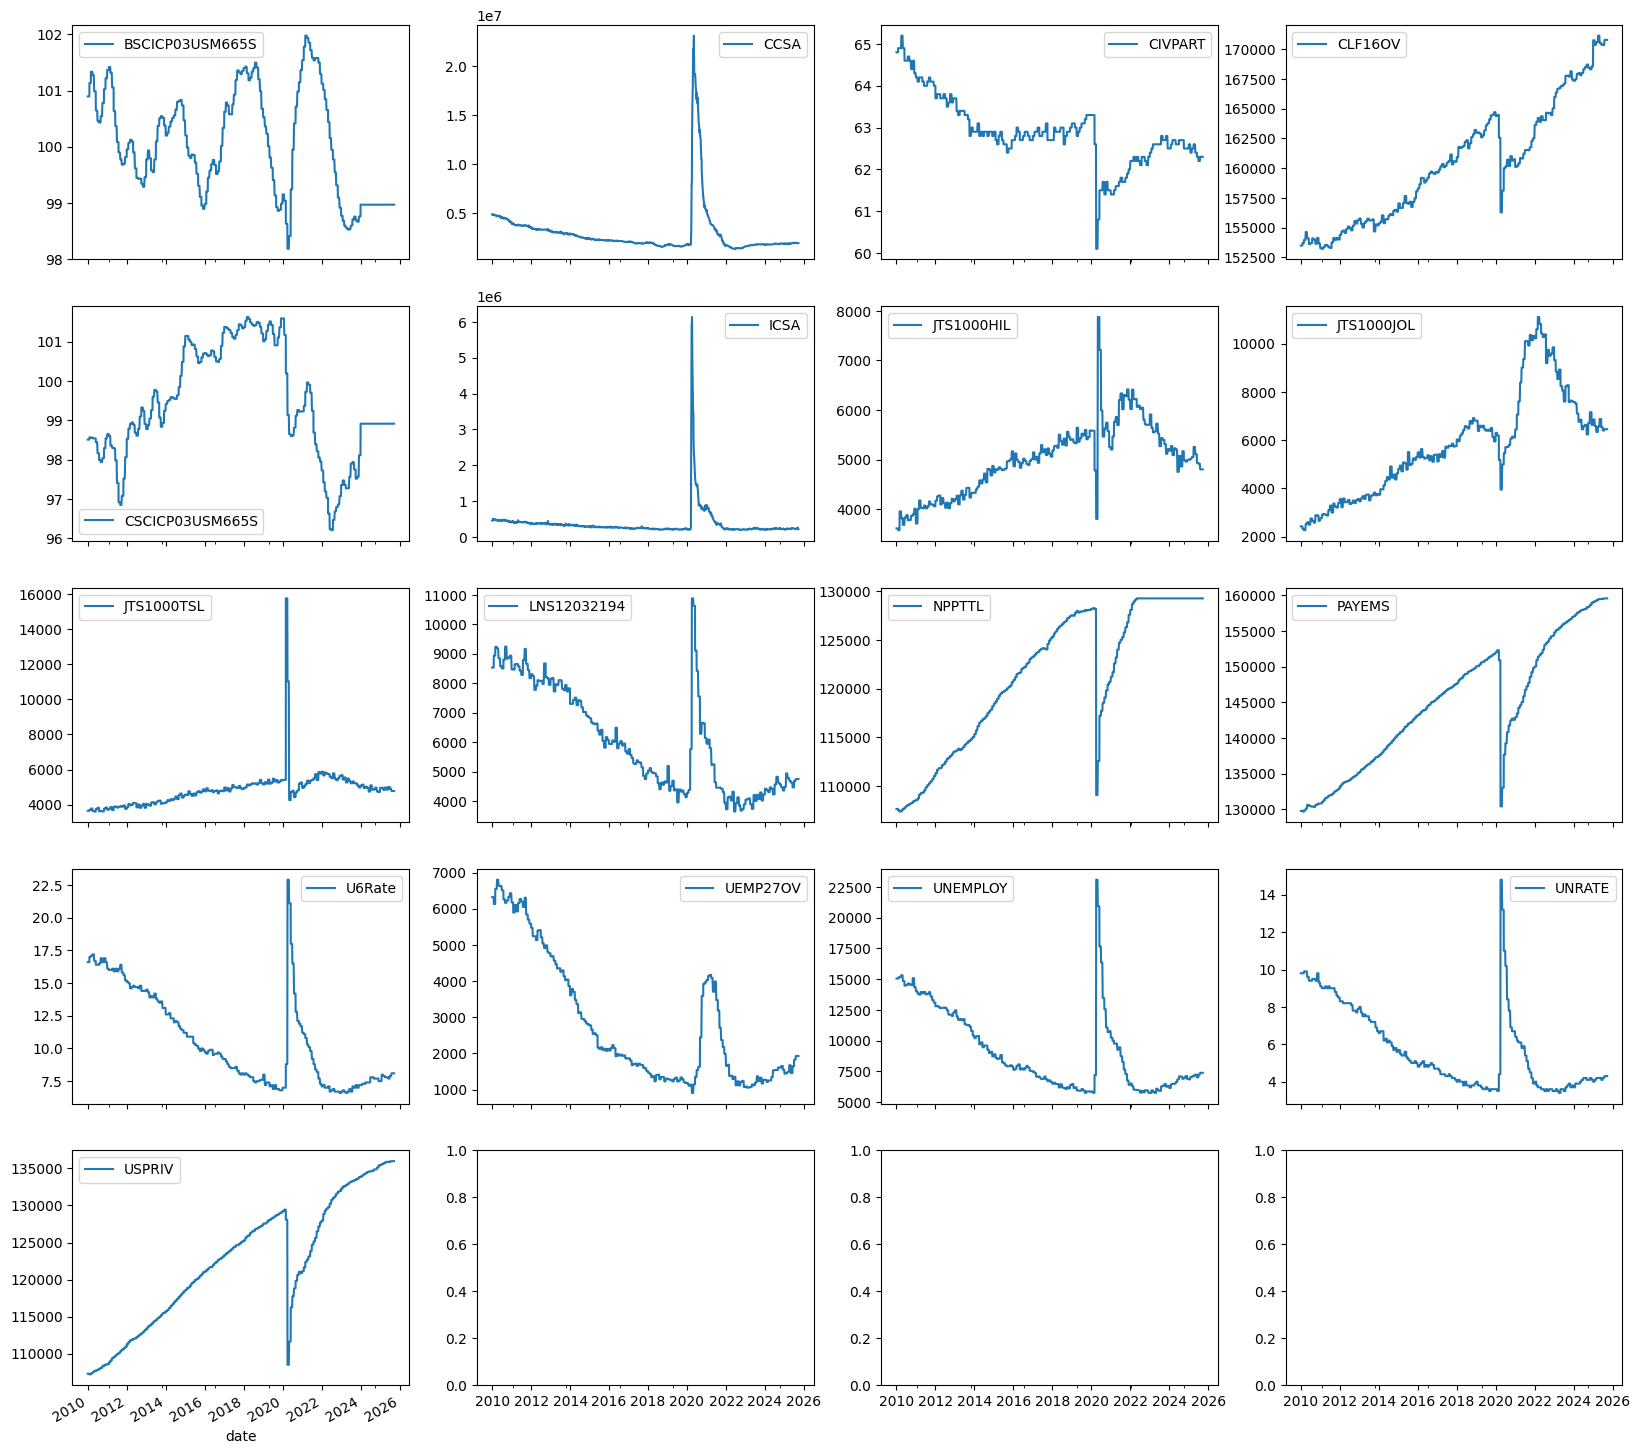

In [23]:
fig, axs = plt.subplots(nrows=plot_rows, ncols=plot_cols, sharex=True, figsize=[20, 20])
i = 0
for r in range(0, plot_rows):
    for c in range(0,plot_cols):
        ax = axs[r, c]
        if i < len(y.columns):
            y.plot(ax=ax, y=y.columns[i])
            i += 1